Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [3]:
# cell for imports. All imports must go here.

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
titanic_data = pd.read_csv("train.csv")
print(titanic_data.info())
print(titanic_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

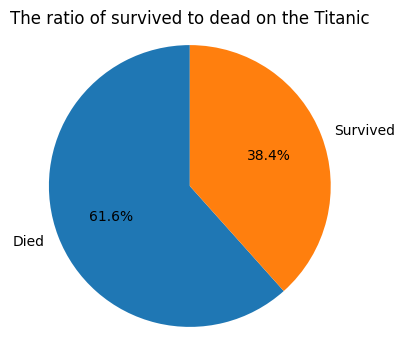

In [11]:
labels = "Died", "Survived"
survived = titanic_data["Survived"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(survived, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("The ratio of survived to dead on the Titanic")
plt.axis("equal")
plt.show()

Ця діаграма показує співвідношення між кількістю виживших та загиблих пасажирів на Титаніку. Кругова діаграма розділена на два сектори: один показує кількість виживших пасажирів, а інший - кількість загиблих. Кожен сектор містить відсоткове співвідношення кількості пасажирів відносно загальної кількості. В результаті ми можемо зробити висновок про те, що більшість пасажирів загинула, оскільки загиблих пасажирів значно більше, ніж виживших.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


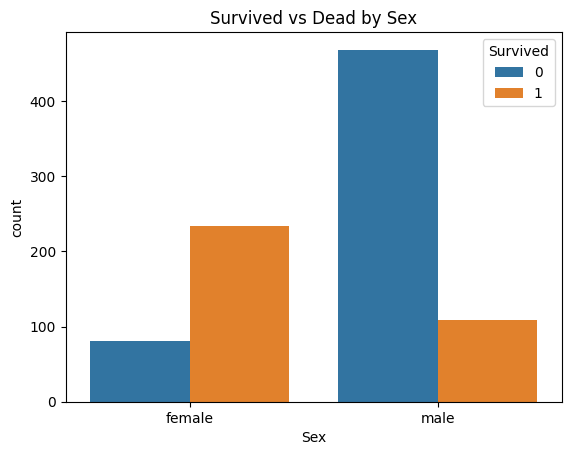

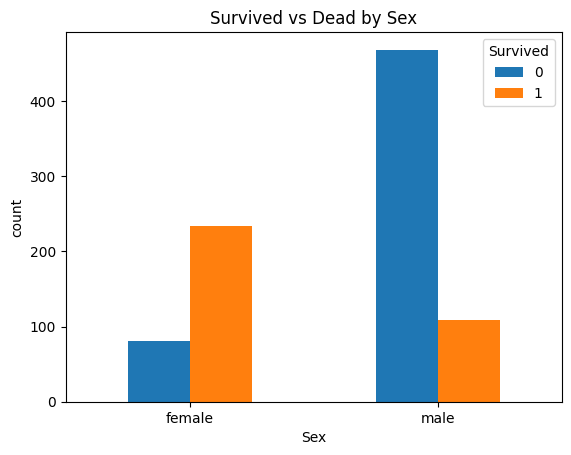

In [6]:
devided_by_sex = titanic_data.groupby(["Sex", "Survived"], as_index=False).count()
devided_by_sex = devided_by_sex.pivot_table(index="Sex", columns="Survived", values="PassengerId", aggfunc="sum")
devided_by_sex.plot(kind="bar", stacked=False)
plt.title("Survived vs Dead by Sex")
plt.xlabel("Sex")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

Ця діаграма показує кількість виживших та загиблих пасажирів в залежності від статі. Графік стовпчиків поділений на два стовпчики для кожної статі: перший стовпчик показує кількість загиблих, а другий - кількість виживших. Це дозволяє порівняти кількість виживших та загиблих пасажирів серед чоловіків та жінок. Видно, що серед жінок було значно більше виживших, ніж загиблих, тоді як серед чоловіків загиблих було більше.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

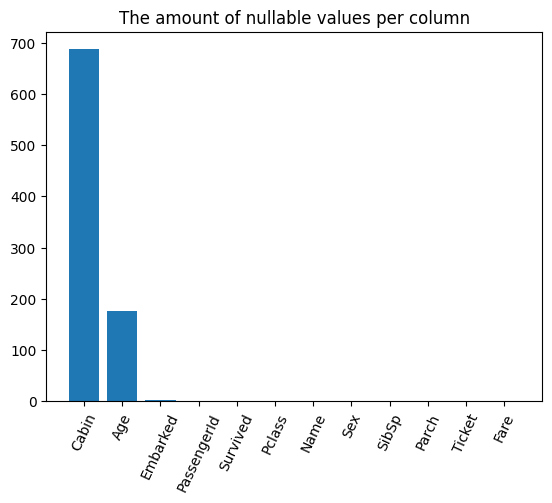

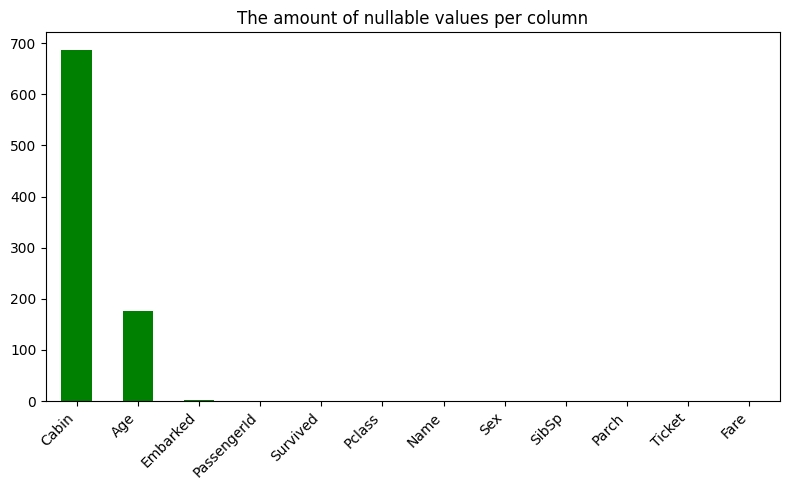

In [7]:
missing_values = titanic_data.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

missing_values.plot(kind="bar", figsize=(8, 5), color="green")
plt.title("The amount of nullable values per column")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

Тут зображено кількість пропущених значень в датасеті по кожній із змінних і можна зробити висновок, що найбільше пропущених значень в "Cabin", а саме майже 700шт.



5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

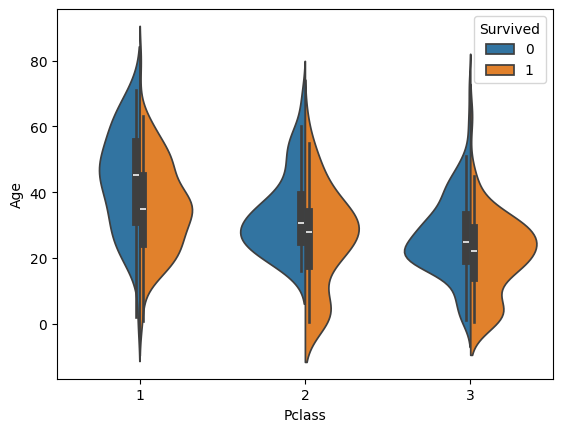

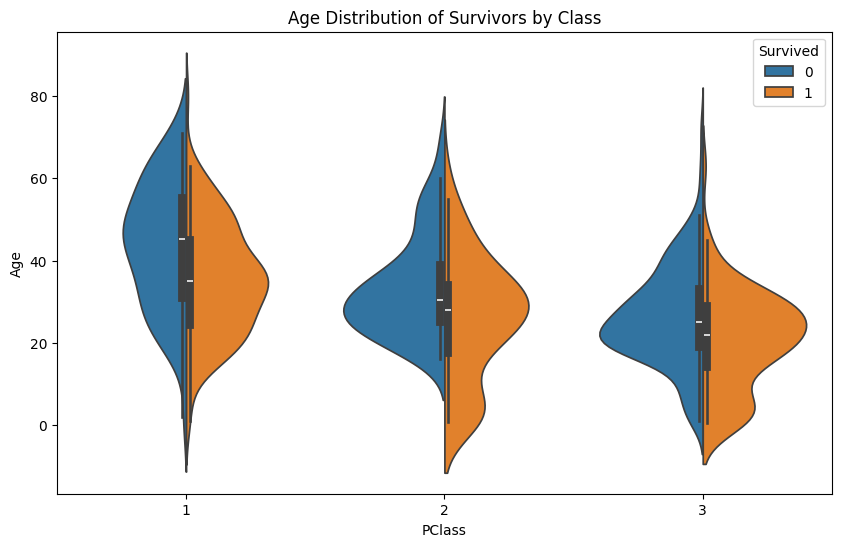

In [8]:
plt.figure(figsize=(10, 6))

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic_data, split=True)
plt.title("Age Distribution of Survivors by Class")
plt.xlabel("PClass")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right")
plt.show()


 За допомогою цієї діаграми можна порівняти розподіл віку серед виживших та загиблих пасажирів для кожного класу сидіння. Ліва частина відображає розподіл віку серед загиблих, а права частина - серед виживших.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


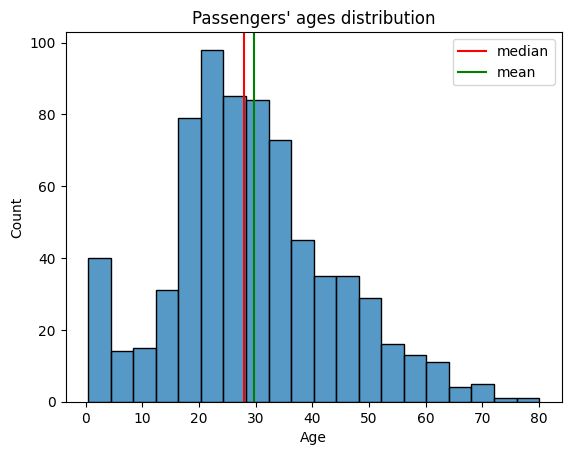

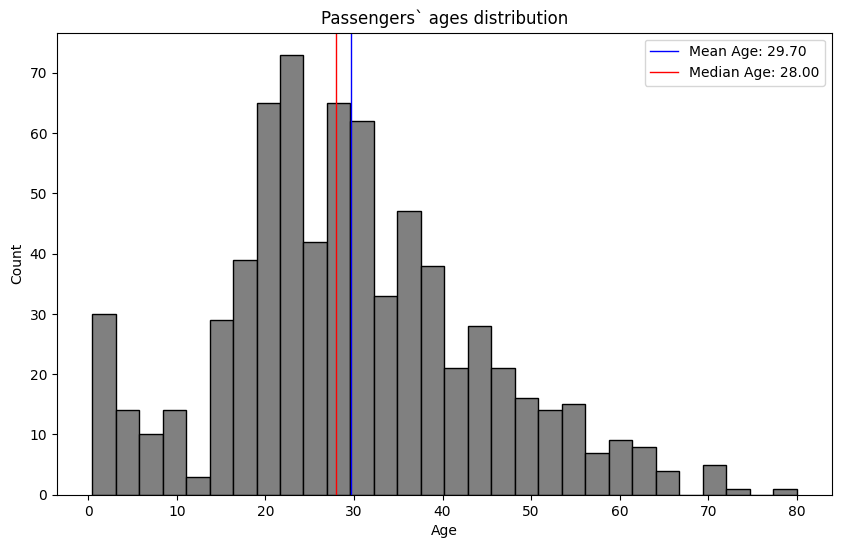

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(titanic_data["Age"].dropna(), bins=30, color="grey", edgecolor="black")
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

plt.title("Passengers` ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.axvline(mean_age, color="blue", linewidth=1, label=f"Mean Age: {mean_age:.2f}")
plt.axvline(median_age, color="red", linewidth=1, label=f"Median Age: {median_age:.2f}")
plt.legend()

plt.show()

Тут ми бачимо скільки людей якого віку були пасажирами на Титаніку, таким чином можна зрозуміти яка вікова категорія купляла більше/менше квитків. Синьою лінією виділено середньо-статистичний вік і це є 29.7 років. Червона ж позначає медіану, тобто середній вік по кількості людей (людей до 28 років так само як і після).

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Показати статистику віку покупців для кожного класу пасажирських місць.

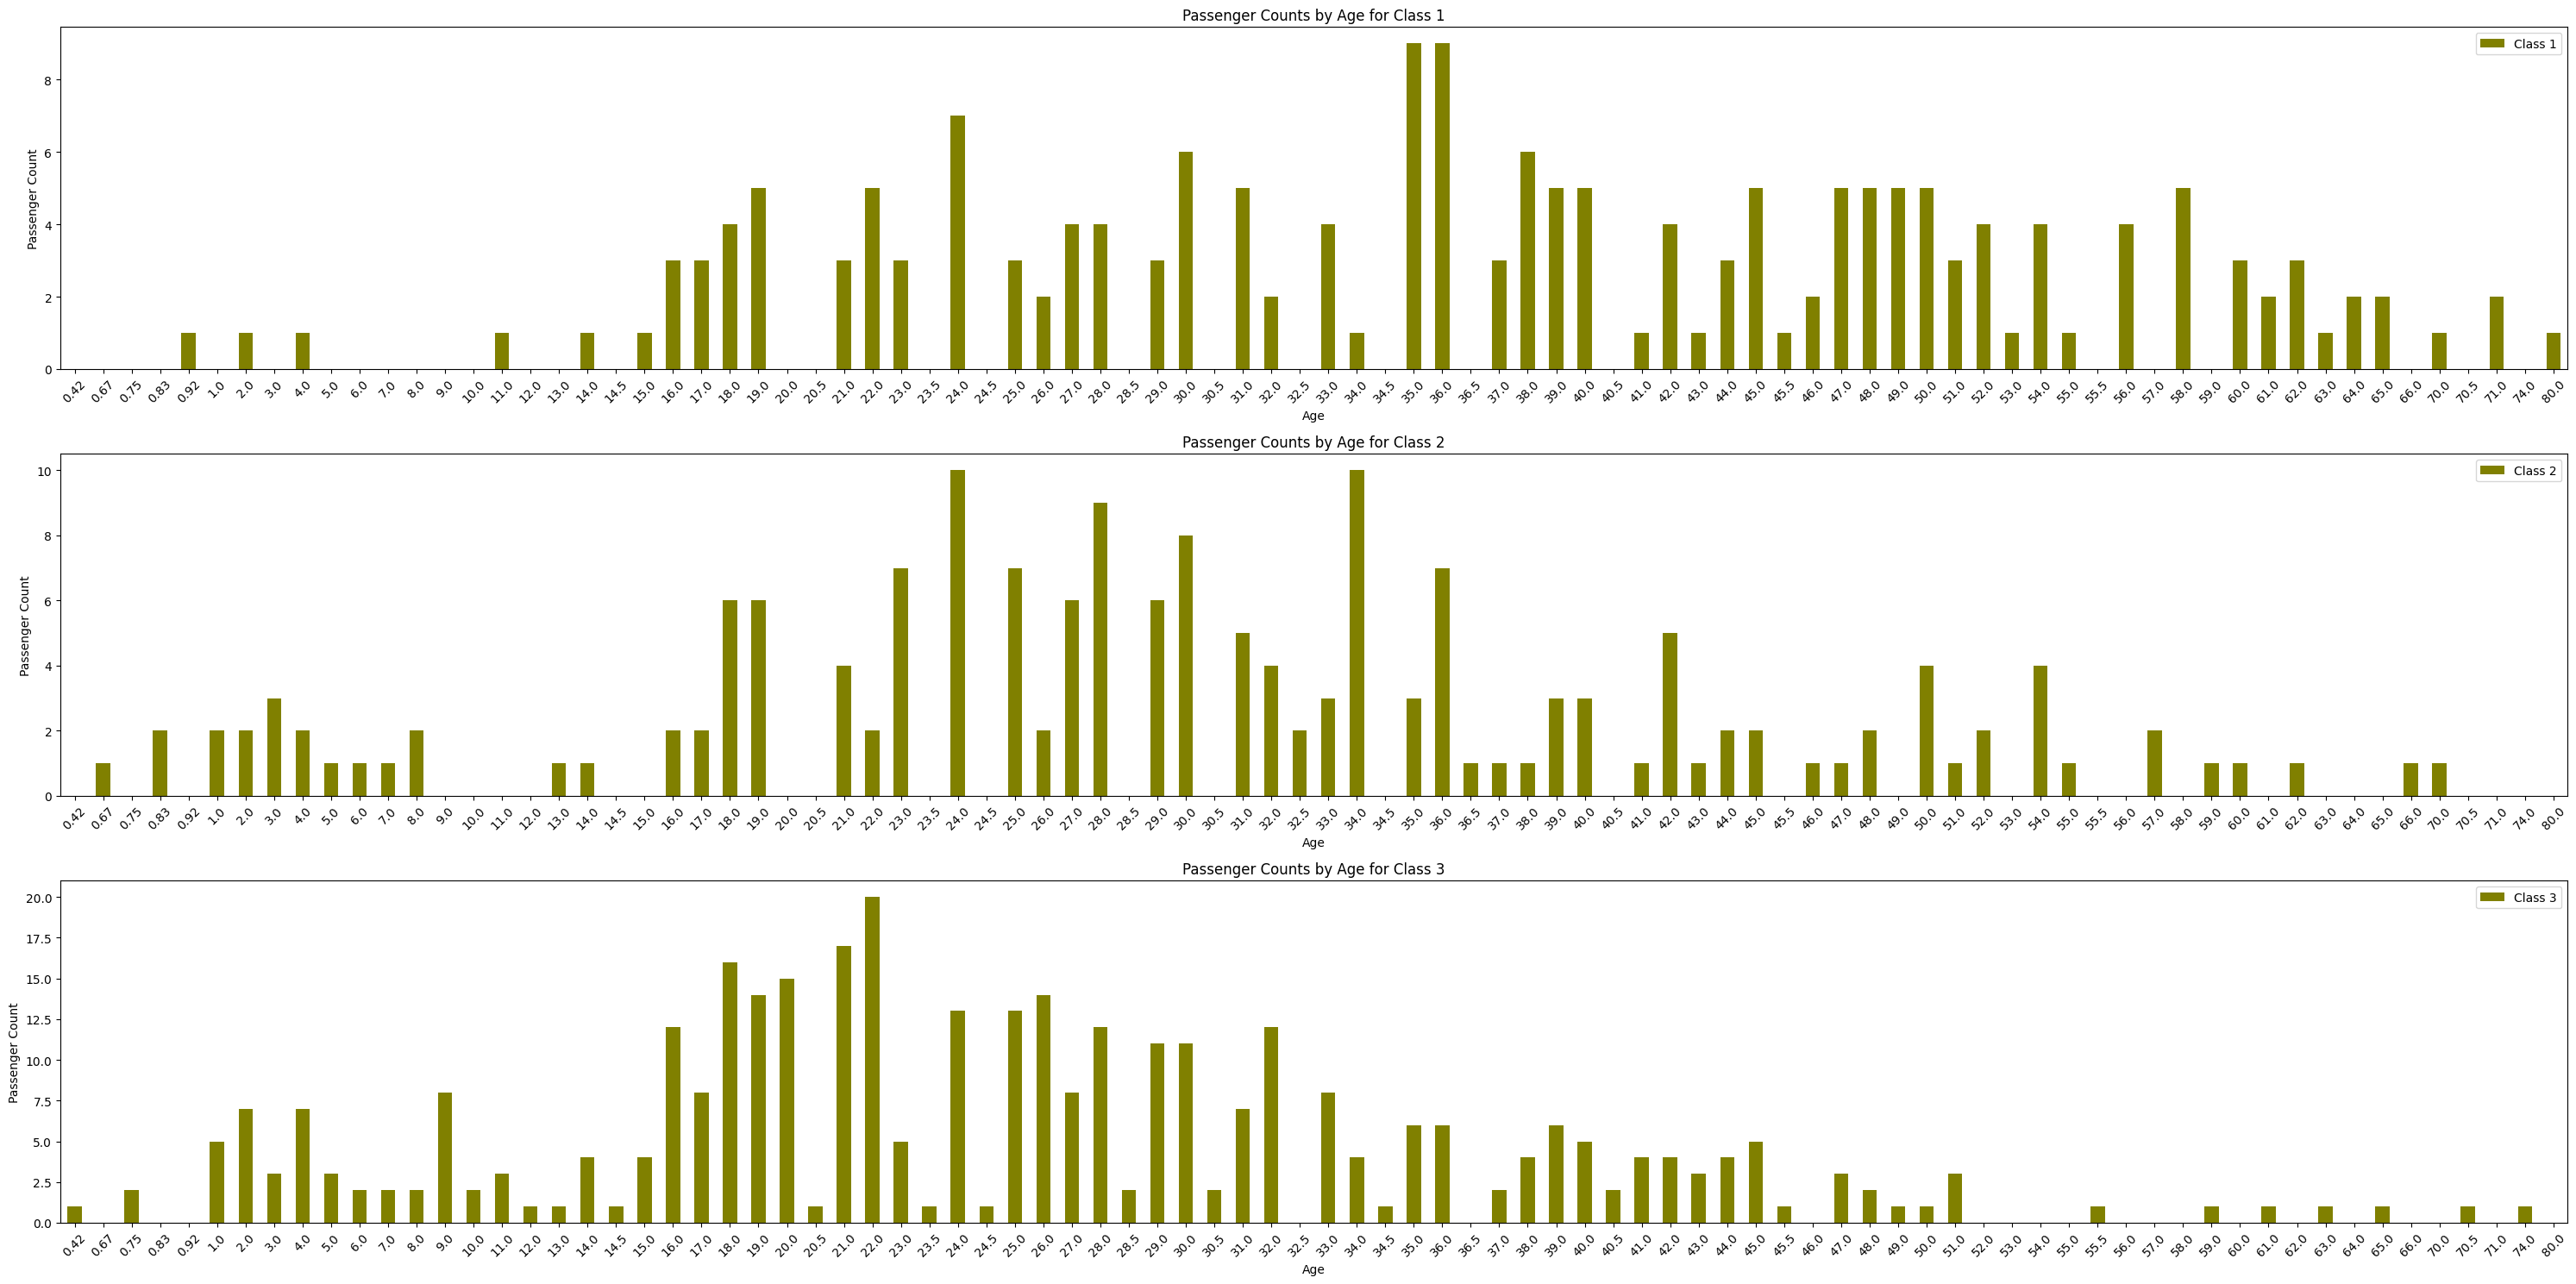

In [10]:
age_class_counts = titanic_data.groupby(["Age", "Pclass"]).size().unstack()

fig, axs = plt.subplots(3, 1, figsize=(30, 15))

for i, ax in enumerate(axs, start=1):
    class_data = age_class_counts[i]
    class_data.plot(kind="bar", ax=ax, color="olive")
    ax.set_title(f"Passenger Counts by Age for Class {i}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Passenger Count")
    ax.tick_params(axis="x", rotation=45)
    ax.legend(["Class " + str(i)])

plt.tight_layout()
plt.show()

За допомогою цих візуалізацій можна проаналізувати якої вікової категорії люди купляють більше чи менше певний клас у вигляді стовбчикової діаграми. Таким чином краще сформувати портрет потенційного клієнта для певного класу.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

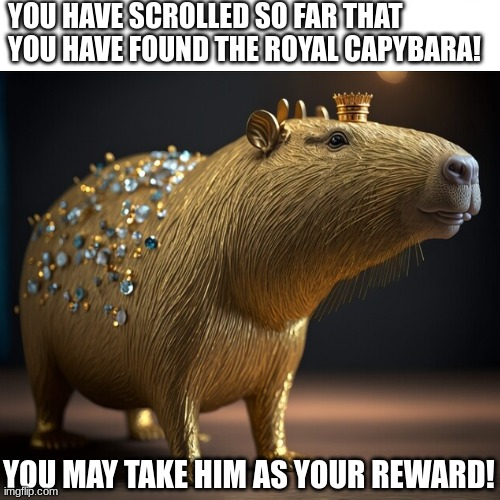